

**Data preparation**

Import needed libraries



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
import missingno as msno

Query data to get csv file


In [ ]:
data =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Employee.csv")
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
data.shape

(4653, 9)

shape fuction use for get number of coloums and number of rows in dataset

In [ ]:
data.shape

(4653, 9)

In [ ]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Check any missing values in dataset

In [ ]:
print(f'Nan values:\n\n{data.isna().sum()}')

Nan values:

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


Identify correlation between every column

<ipython-input-11-2558287f173b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

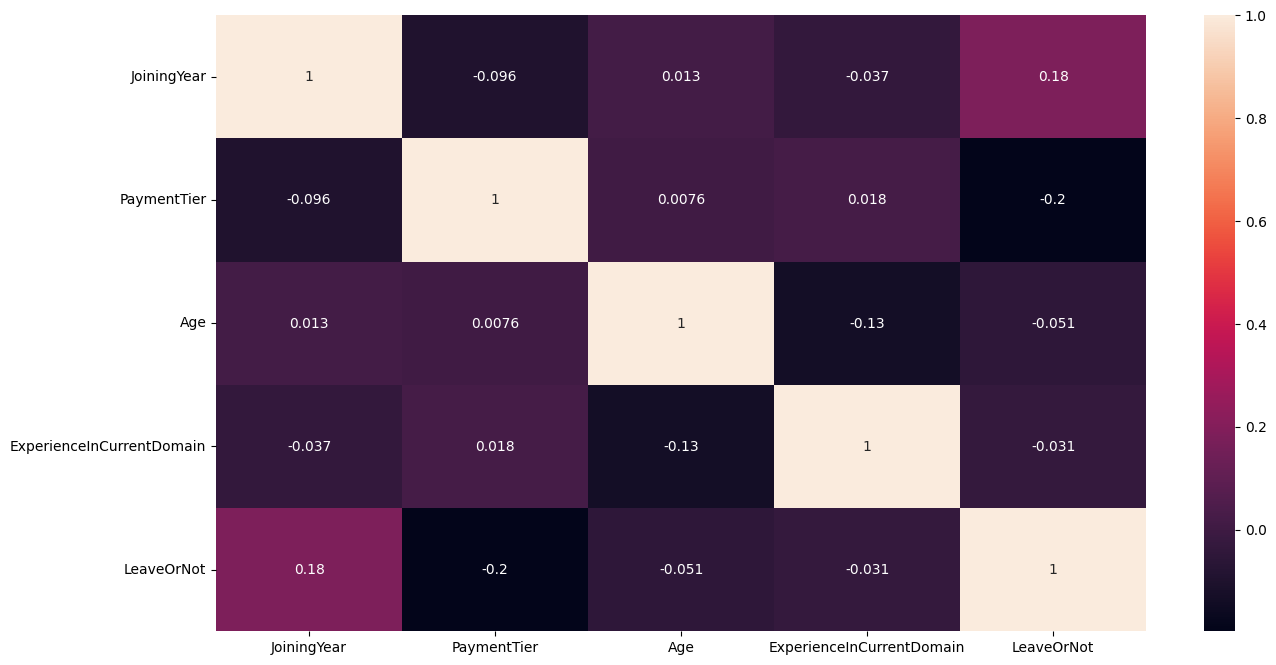

In [ ]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

**Visualization**

Get presentage value for Gender,Everbenched,leaveornot

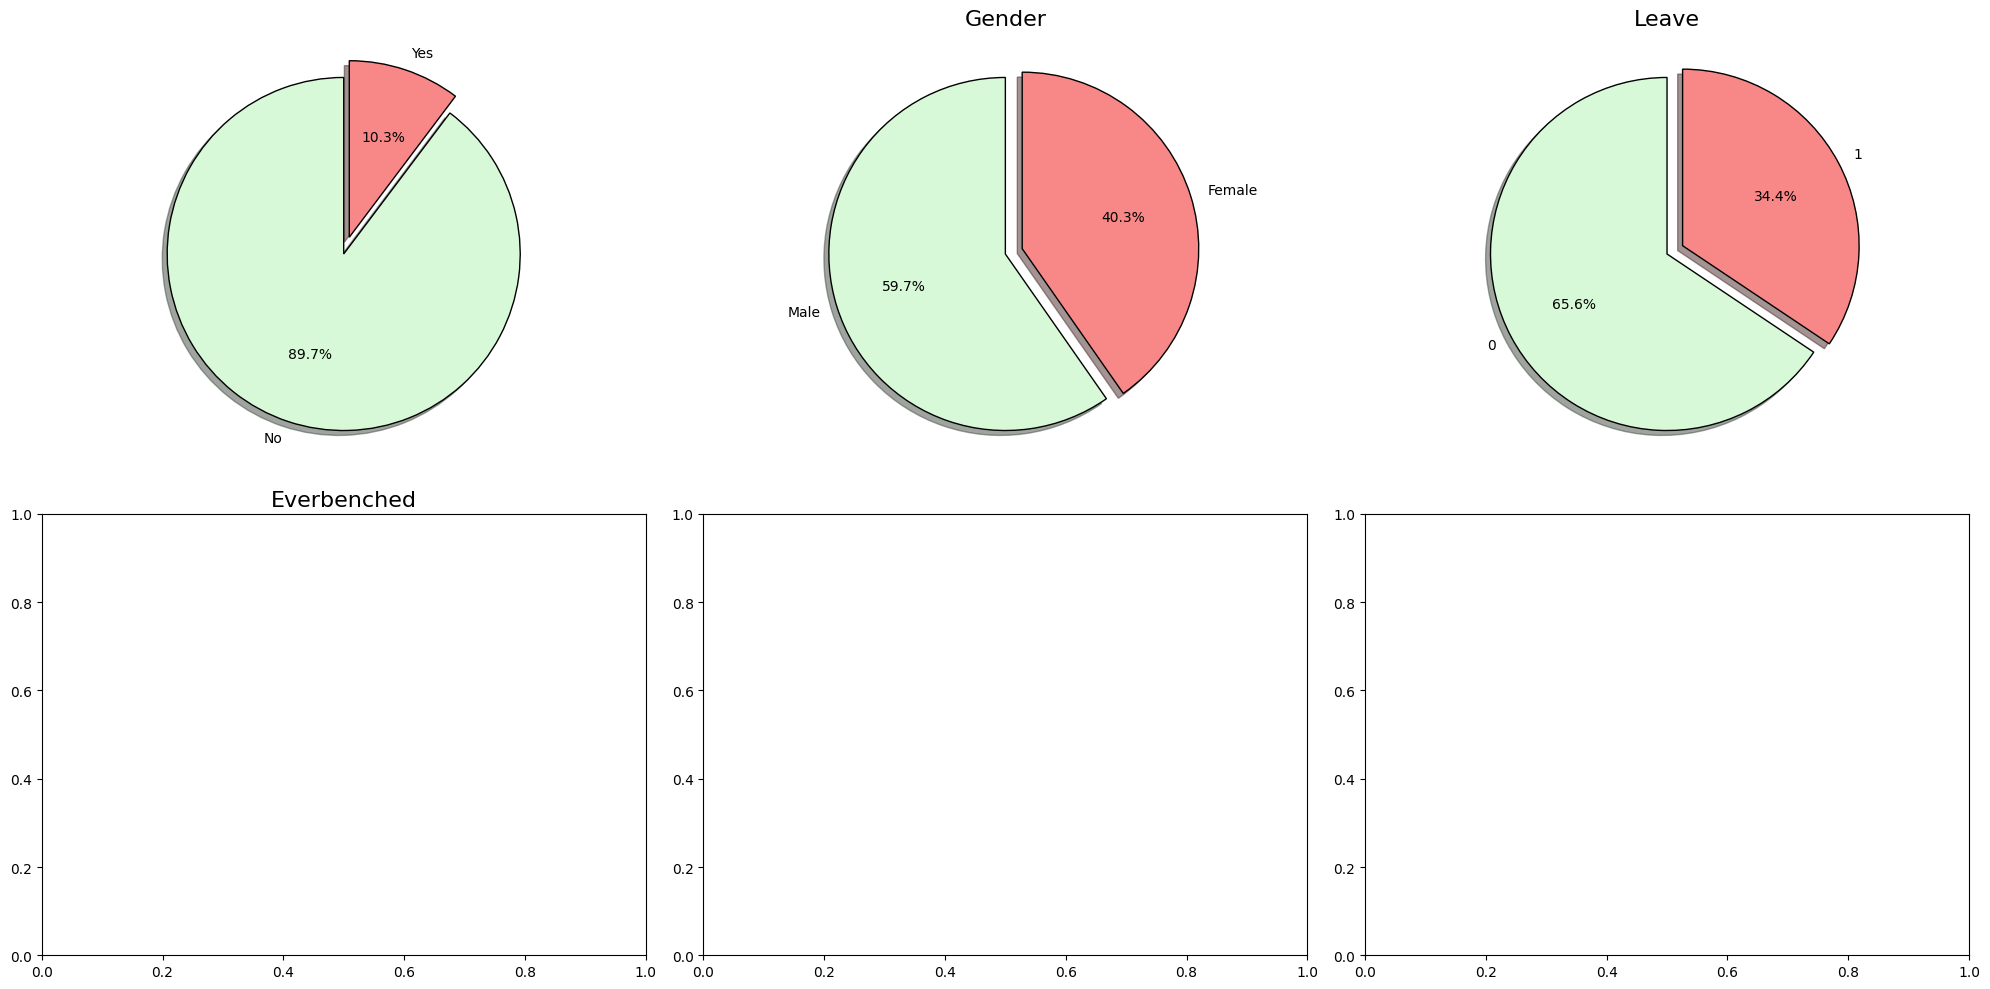

In [ ]:
education = data.Education.value_counts().index
education_count = data.Education.value_counts().values



everBenched = data.EverBenched.value_counts().index
everBenched_count = data.EverBenched.value_counts().values

leaveOrNot = data.LeaveOrNot.value_counts().index
leaveOrNot_count = data.LeaveOrNot.value_counts().values

gender = data.Gender.value_counts().index
gender_count= data.Gender.value_counts().values

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))

ax[0, 0].pie(everBenched_count, labels=everBenched, startangle=90, autopct='%1.1f%%', shadow=True, wedgeprops={'edgecolor':'black'}, explode=[0, 0.1], colors=['#d8f9d8', '#f88888'])
ax[1, 0].set_title('Everbenched', fontsize=16)

ax[0, 1].pie(gender_count, labels=gender, startangle=90, autopct='%1.1f%%', shadow=True, wedgeprops={'edgecolor':'black'}, explode=[0, 0.1], colors=['#d8f9d8', '#f88888'])
ax[0, 1].set_title('Gender', fontsize=16)

ax[0, 2].pie(leaveOrNot_count, labels=leaveOrNot, startangle=90, autopct='%1.1f%%', shadow=True, wedgeprops={'edgecolor':'black'}, explode=[0, 0.1], colors=['#d8f9d8', '#f88888'])
ax[0, 2].set_title('Leave', fontsize=16)


plt.tight_layout()

**Preprocessing**

Features assign to X variable

In [ ]:
features = ['Education',	'JoiningYear',	'City',	'PaymentTier',	'Age',	'Gender',	'EverBenched',	'ExperienceInCurrentDomain'	]
X=data[features]
X


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017,Bangalore,3,34,Male,No,0
1,Bachelors,2013,Pune,1,28,Female,No,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2
3,Masters,2016,Bangalore,3,27,Male,No,5
4,Masters,2017,Pune,3,24,Male,Yes,2
...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4
4649,Masters,2013,Pune,2,37,Male,No,2
4650,Masters,2018,New Delhi,3,27,Male,No,5
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2


Target column (leaveornot) assign to Y variable

In [ ]:
Y=data['LeaveOrNot']
Y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train.shape

(3722, 8)

In [ ]:
X_test.shape

(931, 8)

**One hot encoding**

categorical data convert to numerical data

In [ ]:
Xencode=pd.get_dummies(X,columns=['Education','Gender','EverBenched','City'])
Xencode

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,City_Bangalore,City_New Delhi,City_Pune
0,2017,3,34,0,1,0,0,0,1,1,0,1,0,0
1,2013,1,28,3,1,0,0,1,0,1,0,0,0,1
2,2014,3,38,2,1,0,0,1,0,1,0,0,1,0
3,2016,3,27,5,0,1,0,0,1,1,0,1,0,0
4,2017,3,24,2,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,1,0,0,1,0,1,0,1,0,0
4649,2013,2,37,2,0,1,0,0,1,1,0,0,0,1
4650,2018,3,27,5,0,1,0,0,1,1,0,0,1,0
4651,2012,3,30,2,1,0,0,0,1,0,1,1,0,0


**Split dataset to train and test**

for test we get 20% and for train 80% data from data set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Xencode,Y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(3722, 14)

In [ ]:
X_test.shape

(931, 14)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_train_x = scaler.transform(X_train)
scaled_test_x = scaler.transform(X_test)

**Data Training**

Data train using classification algorithms
Create model class for train data,using different classification algorithms



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
class Model:
    model_names = list()
    accuracy_scores = list()
    cv_scores = list()

    def __init__(self, model, name):
        self.model = model
        Model.model_names.append(name)


    def predict(self):
        self.model.fit(scaled_train_x, Y_train)
        prediction = self.model.predict(scaled_test_x)

        acc = accuracy_score(prediction, Y_test) #model accuracy
        cv = cross_val_score(self.model, scaled_train_x, Y_train, cv=5) #split data for train and text by 5 ways
        Model.accuracy_scores.append(acc)
        Model.cv_scores.append(np.mean(cv))

        print(f'Accuracy Score: {acc}')
        print(f'Classification Report: {classification_report(prediction, Y_test)}')

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = Model(LogisticRegression(), 'Logistic Regression')
model.predict()

Accuracy Score: 0.7099892588614393
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.71      0.80       740
           1       0.39      0.70      0.50       191

    accuracy                           0.71       931
   macro avg       0.64      0.70      0.65       931
weighted avg       0.80      0.71      0.73       931



KNN - K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = Model(KNeighborsClassifier(), 'K-NN')
model.predict()

Accuracy Score: 0.7873254564983888
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.80      0.84       652
           1       0.62      0.76      0.68       279

    accuracy                           0.79       931
   macro avg       0.75      0.78      0.76       931
weighted avg       0.81      0.79      0.79       931



Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = Model(DecisionTreeClassifier(), 'Decision Tree')
model.predict()

Accuracy Score: 0.8109559613319012
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.83      0.85       624
           1       0.69      0.78      0.73       307

    accuracy                           0.81       931
   macro avg       0.79      0.80      0.79       931
weighted avg       0.82      0.81      0.81       931



 Random forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = Model(RandomForestClassifier(), 'Random Forest')
model.predict()

Accuracy Score: 0.8281417830290011
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.83      0.87       636
           1       0.70      0.81      0.75       295

    accuracy                           0.83       931
   macro avg       0.80      0.82      0.81       931
weighted avg       0.84      0.83      0.83       931



Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

model = Model(SVC(), 'SVC')
model.predict()

Accuracy Score: 0.7744360902255639
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.75      0.84       738
           1       0.48      0.85      0.61       193

    accuracy                           0.77       931
   macro avg       0.71      0.80      0.73       931
weighted avg       0.85      0.77      0.79       931



Naive Bayesian

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = Model(GaussianNB(), 'GaussianNB')
model.predict()

Accuracy Score: 0.686358754027927
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.74      0.75       604
           1       0.55      0.58      0.57       327

    accuracy                           0.69       931
   macro avg       0.66      0.66      0.66       931
weighted avg       0.69      0.69      0.69       931



Models Evaluation

In [ ]:
scores_df = pd.DataFrame({'Model':Model.model_names, 'Accuracy':Model.accuracy_scores, 'CV':Model.cv_scores})
scores_df.sort_values(by='Accuracy', ascending=False, inplace=True)

scores_df

,Model,Accuracy,CV
3,Random Forest,0.828142,0.824562
2,Decision Tree,0.810956,0.808710
1,K-NN,0.787325,0.802798
4,SVC,0.774436,0.796348
0,Logistic Regression,0.709989,0.738045
5,GaussianNB,0.686359,0.702041


Hyper parameter tunning for random forest algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV




rf = RandomForestClassifier()

# Define parameters
params = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object for Random Forest
best_model_rf = GridSearchCV(rf, params, cv=5)

# Fit the model to the training data
best_model_rf.fit(scaled_train_x, Y_train)


print(f'Score After Hyperparameter Tuning: {best_model_rf.score(scaled_test_x, Y_test)}')
print(f'Best Parameters: {best_model_rf.best_params_}')

Score After Hyperparameter Tuning: 0.8517722878625135
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
